# Notebook 15: PCA
Principle components analysis of food data with visualization.

In [180]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline

# ggplot styling
plt.style.use('ggplot')

In [76]:
# Load in food data
out = open('data/final/food_1970_2000_cleaned.p', 'r')
food_1970_2000 = pickle.load(out)
out.close()

In [77]:
# Fit PCA with 2 components on 1970-2000 data
pca_1970_2000_2 = PCA(n_components=2)
food_1970_2000_2_r = pca_1970_2000_2.fit(scale(food_1970_2000)).transform(scale(food_1970_2000))
print('explained variance ratio (first two components): %s'
      % str(pca_1970_2000_2.explained_variance_ratio_))

# Fit PCA with 3 components on 1970-2000 data
pca_1970_2000_3 = PCA(n_components=3)
food_1970_2000_3_r = pca_1970_2000_3.fit(scale(food_1970_2000)).transform(scale(food_1970_2000))
print('explained variance ratio (first three components): %s'
      % str(pca_1970_2000_3.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.14928763  0.09750176]
explained variance ratio (first three components): [ 0.14928763  0.09750176  0.04902742]


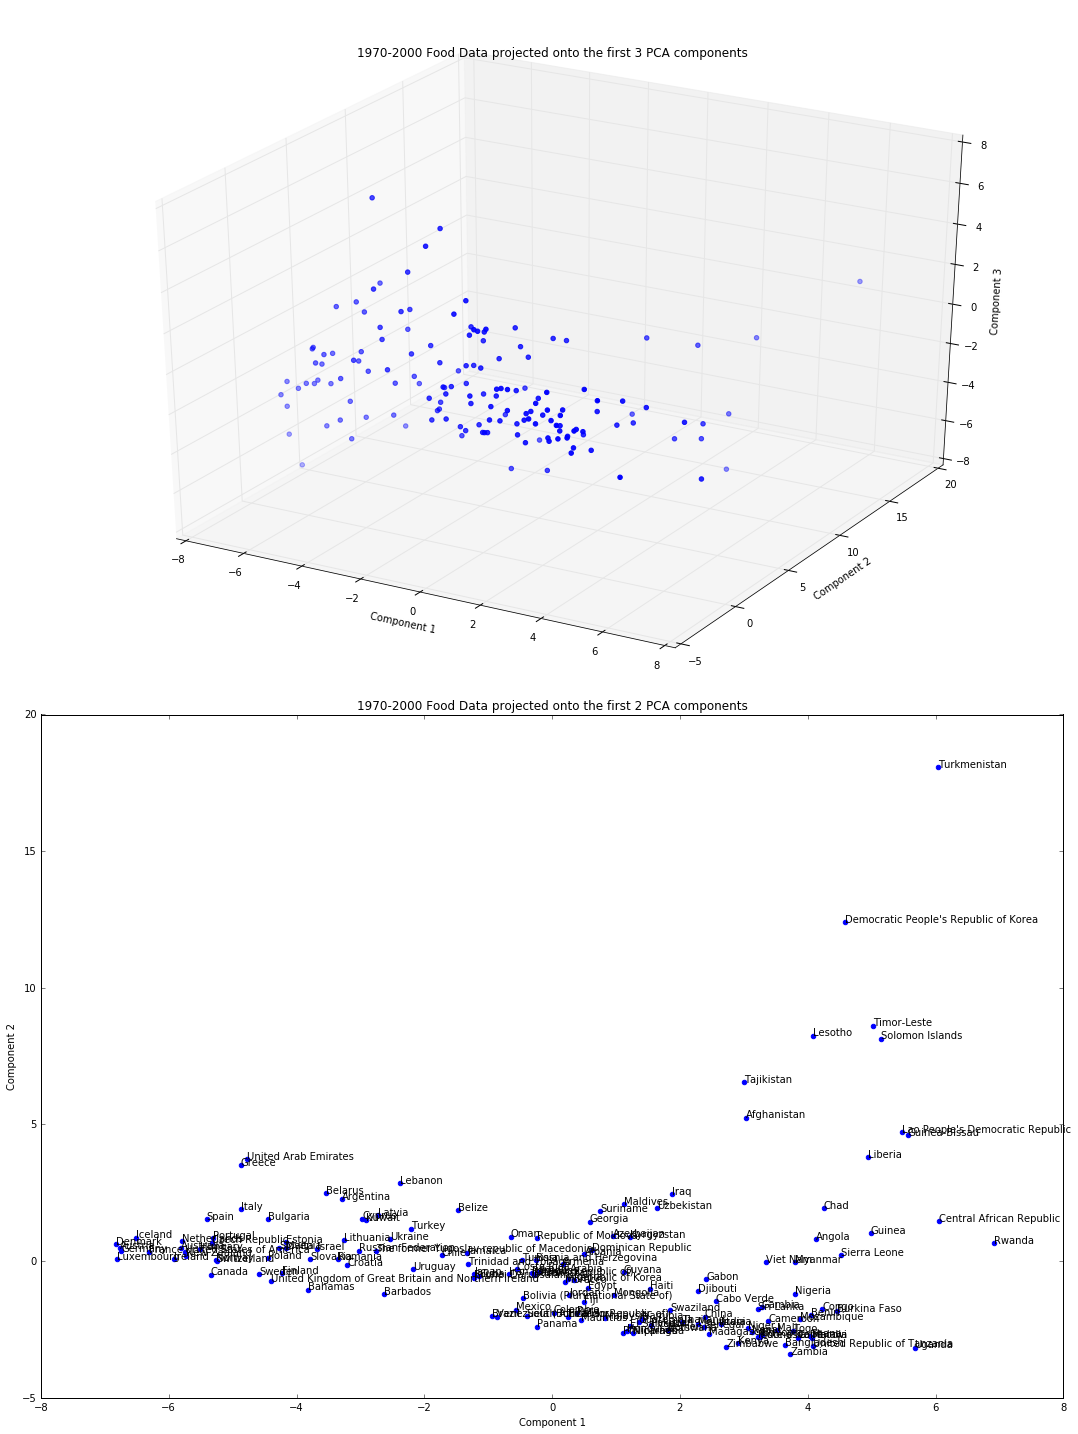

In [78]:
# Visualize our reduced data
fig = plt.figure(figsize=(15, 20))

# Visualize PCA with 2 components
ax2 = fig.add_subplot(2, 1, 2)
ax2.scatter(food_1970_2000_2_r[:, 0], food_1970_2000_2_r[:, 1], color='b')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('1970-2000 Food Data projected onto the first 2 PCA components')
ax2.legend()

# Visualize PCA with 3 components
ax1 = fig.add_subplot(2, 1, 1,  projection='3d')
ax1.scatter(food_1970_2000_3_r[:, 0], food_1970_2000_3_r[:, 1], food_1970_2000_3_r[:, 2], color='b')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('1970-2000 Food Data projected onto the first 3 PCA components')
ax1.legend()

# Annotate points with country name
for i, country in enumerate(food_1970_2000.index):
    ax2.annotate(country, (food_1970_2000_2_r[i, 0], food_1970_2000_2_r[i, 1]))

plt.tight_layout()
plt.show()

As we saw with the network graph visualization of countries using a nearest neighbors approach, we see that countries that are close to one another geographically do tend to be close together in the PCA projection of food data. However, this is not always the case.

## Export 3d projection to CSV for visualization with plotly
We'll export the coordinates for the PCA with 3 dimensions to a csv file so that we can create an interactive visualization with [plotly.js](https://plot.ly/javascript/) in our final website.

In [79]:
pca_data = pd.DataFrame(food_1970_2000_3_r, index=list(food_1970_2000.index), columns=['x', 'y', 'z'])
pca_data.to_csv("data/pca/food_by_country.csv", index_label="Country")

## Interpretation of First 3 PCA components

Since each PCA component is a linear combination of the original features, then in this case each component can be interpreted as a particular "diet". Let's see what the "diet" associated with each of the first 3 components is, filtering out only loadings with values greater than 0.1 in absolute value for interpretability.

In [153]:
# Get first three PCA components
pc1 = pd.Series(pca_1970_2000_3.components_[0], index=food_1970_2000.columns)
pc2 = pd.Series(pca_1970_2000_3.components_[1], index=food_1970_2000.columns)
pc3 = pd.Series(pca_1970_2000_3.components_[2], index=food_1970_2000.columns)

loading_cutoff = 0.1
# Filter out only for features with loading > loading_cutoff in absolute value
pc1f = pc1[(pc1 <= -loading_cutoff) | (pc1 >= loading_cutoff)].sort_values()
pc2f = pc1[(pc2 <= -loading_cutoff) | (pc2 >= loading_cutoff)].sort_values()
pc3f = pc1[(pc3 <= -loading_cutoff) | (pc3 >= loading_cutoff)].sort_values()

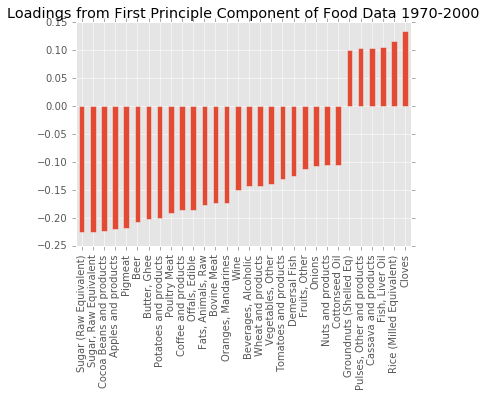

In [185]:
pc1f.plot(kind="bar", title="Loadings from First Principle Component of Food Data 1970-2000")

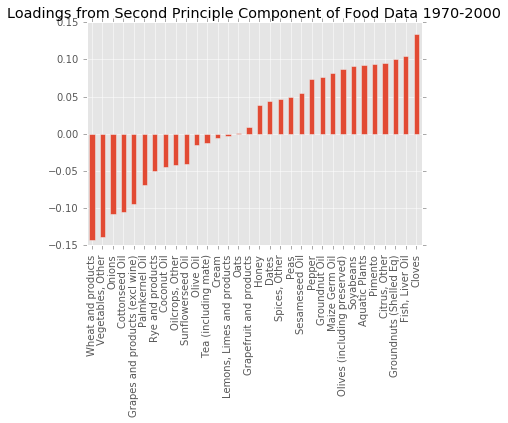

In [182]:
pc2f.plot(kind="bar", title="Loadings from Second Principle Component of Food Data 1970-2000")

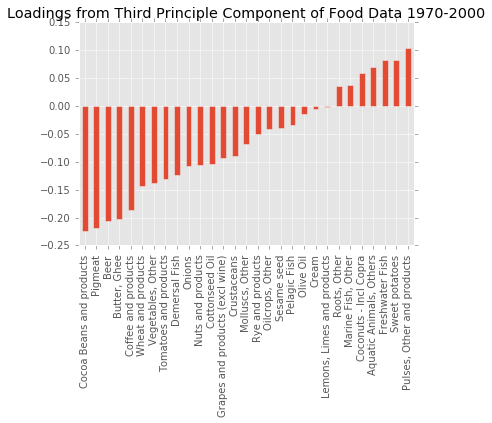

In [183]:
pc3f.plot(kind="bar", title="Loadings from Third Principle Component of Food Data 1970-2000")

Interesting. 

### First component as proxy for how developed a country is?
Looking at the plot first component of the 2D projection of PCA, we see that the first component looks like a proxy for how developed a country is, with more developed countries on the left hand side of the graph and less developed countries on the right hand side of the graph.

The loadings seem to support this conclusion. Looking at the loadings for the first component we see that foods such as sugar, cocoa (probably a proxy for chocolate products) and meats are associated with more developed countries while staples such as rice and pulses (legumes) are associated with the less developed countries on the right of the graph.

The other two components are not as easily interpretable, though the first component is nonetheless very interesting indeed.